In [4]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Define the ticker for Ethereum
eth_ticker = yf.Ticker("ETH-USD")

# Check if the CSV file already exists
if os.path.exists("eth.csv"):
    eth = pd.read_csv("eth.csv", index_col=0)
else:
    eth = eth_ticker.history(period="max")
    eth.to_csv("eth.csv")

<Axes: xlabel='Date'>

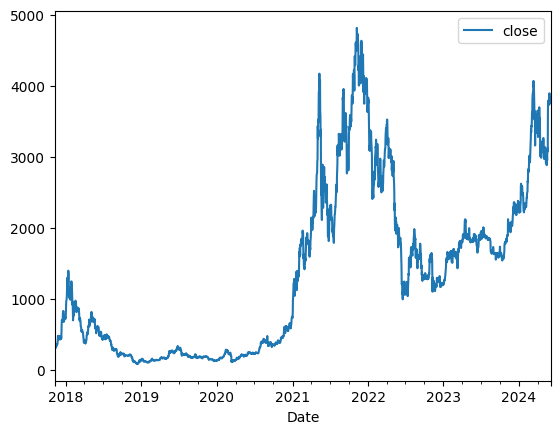

In [6]:
# Convert index to datetime
eth.index = pd.to_datetime(eth.index)

# Remove unnecessary columns
del eth["Dividends"]
del eth["Stock Splits"]

# Convert column names to lowercase
eth.columns = [c.lower() for c in eth.columns]

# Plot the closing price
eth.plot.line(y="close", use_index=True)

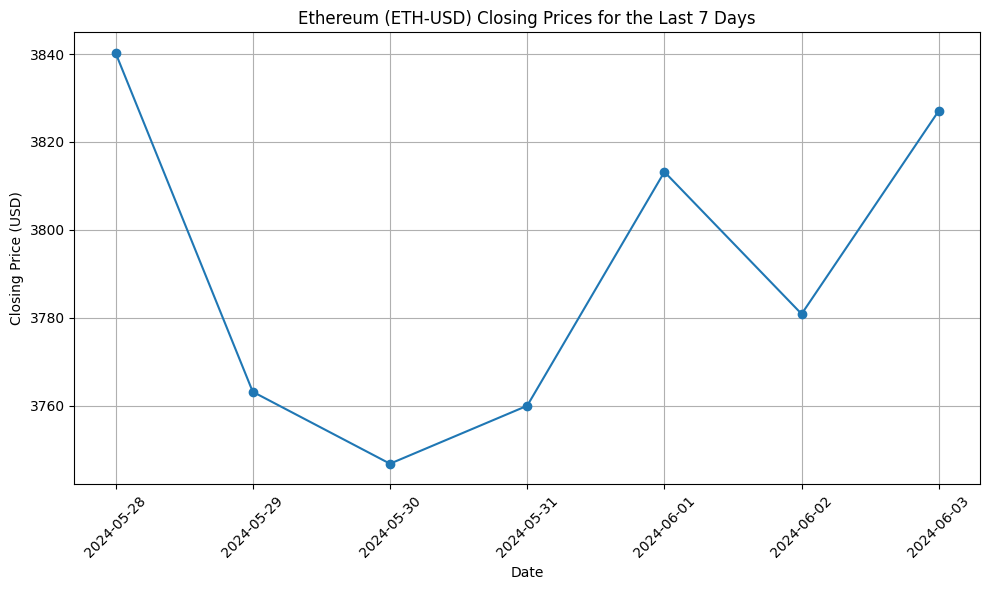

In [7]:
# Filter the data for the last seven days
last_seven_days_eth = eth[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_eth.index, last_seven_days_eth['close'], marker='o')
plt.title('Ethereum (ETH-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()